# Лабораторная работа № 14  
Численное решение краевой задачи для эллипитического уравнения

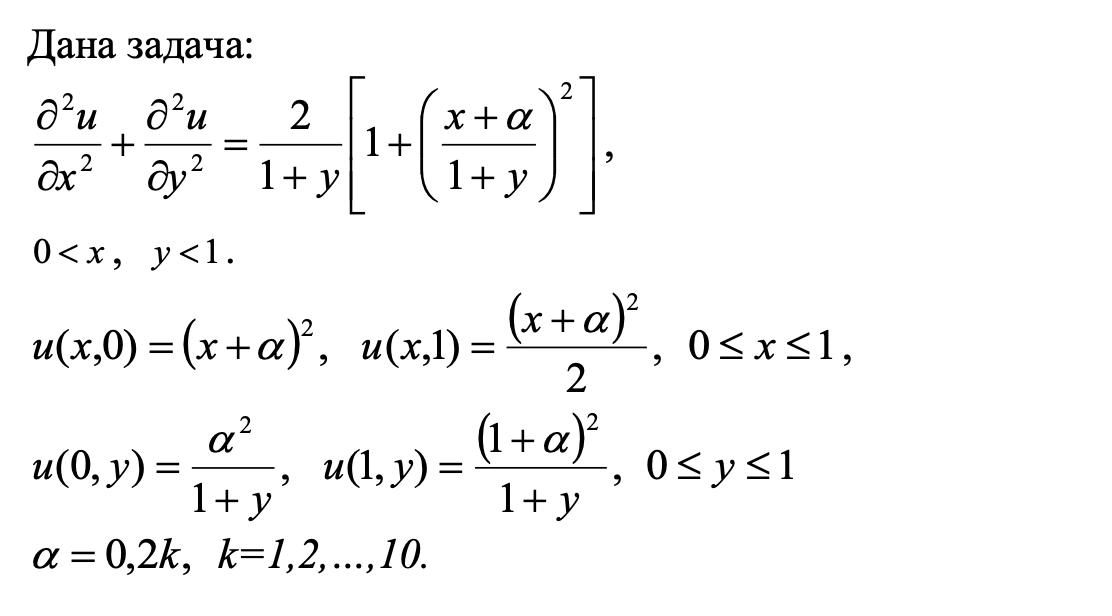

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def u(x, y, a=1):
    return (x + a) ** 2 / (1 + y)

In [ ]:
def f(x, y, a=1):
    v = 1 + ((x + a) / (1 + y)) ** 2
    return (2 / (1 + y)) * v

def mu_left(y, a=1):
    return a**2 / (1 + y)

def mu_right(y, a=1):
    return (1 + a) ** 2 / (1 + y)

def mu_top(x, a=1):
    return (x + a) ** 2 / 2

def mu_bottom(x, a=1):
    return (x + a) ** 2

# Метод Зейделя

In [ ]:
def solve1(f, mu_left, mu_right, mu_bottom, mu_top, a, b, c, d, N, M, eps=1e-4):
    x = np.linspace(a, b, N)
    y = np.linspace(c, d, M)
    u = np.zeros((N, M))
    hx = x[1] - x[0]
    hy = y[1] - y[0]

    for i in range(N):
        u[i, 0] = mu_bottom(x[i])
        u[i, -1] = mu_top(x[i])

    for j in range(M):
        u[0, j] = mu_left(y[j])
        u[-1, j] = mu_right(y[j])

    iters = 0
    while True:
        max_diff = -np.inf
        for i in range(1, N-1):
            for j in range(1, M-1):
                v1 = hy**2 * (u[i-1, j] + u[i + 1, j])
                v2 = hx**2 * (u[i, j-1] + u[i, j+1])
                v3 = hx**2 * hy**2  * f(x[i], y[j])

                u_new = (v1 + v2 - v3) / (2 * (hx**2 + hy**2))

                diff = abs(u_new - u[i, j])
                max_diff = max(max_diff, diff)

                u[i, j] = u_new

        iters += 1
        if max_diff <= eps:
            return u, iters


    return u, iters

In [ ]:
a = 0
b = 1

c = 0
d = 1

N = 100
M = 100

result1, iters1 = solve1(f, mu_left, mu_right, mu_bottom, mu_top, a, b, c, d, N, M)

In [ ]:
x = np.linspace(a, b, N)
y = np.linspace(c, d, M)
X, Y = np.meshgrid(x, y, indexing="ij")

u_exact = u(X, Y)

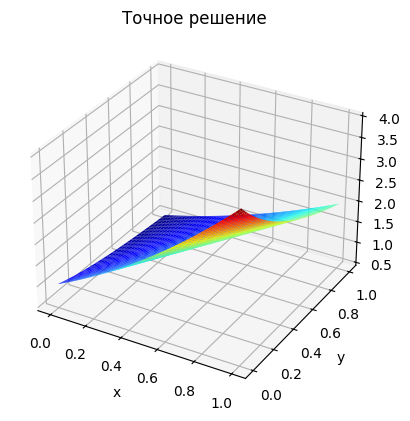

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')

axes.set_title("Точное решение")
axes.plot_surface(X, Y, u(X, Y), cmap="jet")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("u")

plt.show()

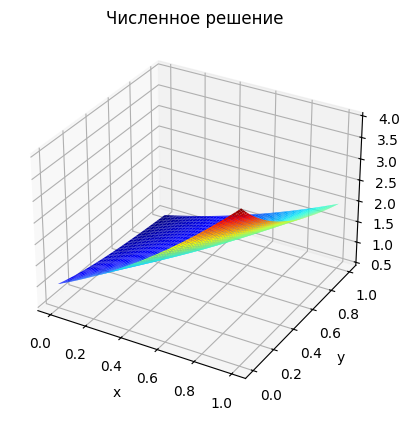

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')

axes.set_title("Численное решение")
axes.plot_surface(X, Y, result1, cmap="jet")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("u")

plt.show()

# Метод простой итерации

In [ ]:
def solve2(f, mu_left, mu_right, mu_bottom, mu_top, a, b, c, d, N, M, eps=1e-4):
    x = np.linspace(a, b, N)
    y = np.linspace(c, d, M)
    hx = x[1] - x[0]
    hy = y[1] - y[0]

    u_old = np.zeros((N, M))
    u_new = np.zeros((N, M))

    for i in range(N):
        u_old[i, 0] = mu_bottom(x[i])
        u_old[i, -1] = mu_top(x[i])
        u_new[i, 0] = mu_bottom(x[i])
        u_new[i, -1] = mu_top(x[i])

    for j in range(M):
        u_old[0, j] = mu_left(y[j])
        u_old[-1, j] = mu_right(y[j])
        u_new[0, j] = mu_left(y[j])
        u_new[-1, j] = mu_right(y[j])

    iters = 0
    while True:
        max_diff = 0.0
        for i in range(1, N-1):
            for j in range(1, M-1):
                u_new[i, j] = (
                    hy**2 * (u_old[i-1, j] + u_old[i+1, j]) +
                    hx**2 * (u_old[i, j-1] + u_old[i, j+1]) -
                    hx**2 * hy**2 * f(x[i], y[j])
                ) / (2 * (hx**2 + hy**2))

                max_diff = max(max_diff, abs(u_new[i, j] - u_old[i, j]))

        iters += 1
        if max_diff <= eps:
            return u_new, iters

        u_old, u_new = u_new, u_old

    return u_new, iters

In [ ]:
a = 0
b = 1

c = 0
d = 1

N = 100
M = 100

result2, iters2 = solve2(f, mu_left, mu_right, mu_bottom, mu_top, a, b, c, d, N, M)

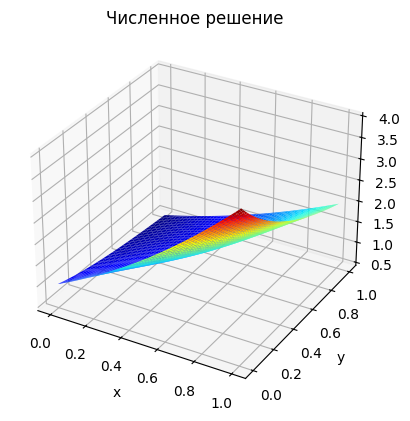

In [45]:
x = np.linspace(a, b, N)
y = np.linspace(c, d, M)
X, Y = np.meshgrid(x, y, indexing="ij")

fig = plt.figure()
axes = fig.add_subplot(projection='3d')

axes.set_title("Численное решение")
axes.plot_surface(X, Y, result2, cmap="jet")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("u")

plt.show()

# Сравнение решений

In [46]:
x = np.linspace(a, b, N)
y = np.linspace(c, d, M)
X, Y = np.meshgrid(x, y, indexing="ij")

u_exact = u(X, Y)

In [49]:
print(f"Максимальная абс. погрешность (м. Зейделя): {np.max(abs(u_exact - result1))}")
print(f"Максимальная отн. погрешность (м. Зейделя): {np.max(abs((u_exact - result1) / u_exact)) * 100}")
print(f"Количество итераций (м. Зейделя): {iters1}")
print(f"Оценка количества итераций: {-(N / np.pi)**2 * np.log((1e-4))}")
print()
print(f"Максимальная абс. погрешность (м. простой итерации): {np.max(abs(u_exact - result2))}")
print(f"Максимальная отн. погрешность (м. простой итерации): {np.max(abs((u_exact - result2) / u_exact)) * 100}")
print(f"Количество итераций (м. простой итерации): {iters2}")


Максимальная абс. погрешность (м. Зейделя): 0.0991796183702014
Максимальная отн. погрешность (м. Зейделя): 7.442014981785975
Количество итераций (м. Зейделя): 3224
Оценка количества итераций: 9332.025882374362

Максимальная абс. погрешность (м. простой итерации): 0.19839010543678293
Максимальная отн. погрешность (м. простой итерации): 14.76060699696847
Количество итераций (м. простой итерации): 5061


In [ ]:
data = {
    "n": [],
    "N": [],
    "M": [],
    "err": [],
}

for n in range(5):
    N = 5 * 2**n
    M = 10 * 2**n

    x = np.linspace(a, b, N)
    y = np.linspace(c, d, M)
    X, Y = np.meshgrid(x, y, indexing="ij")

    u_exact = u(X, Y)
    result = solve(f, mu_left, mu_right, mu_bottom, mu_top, a, b, c, d, N, M, max_iter=1000)

    err = np.max(abs(u_exact - result))

    data["n"].append(n)
    data["N"].append(N)
    data["M"].append(M)
    data["err"].append(err)

In [ ]:
display(pd.DataFrame(data))

,n,N,M,err
0,0,5,10,2.328360e-08
1,1,10,20,1.272303e-07
2,2,20,40,5.927184e-07
3,3,40,80,1.156516e-02
4,4,80,160,2.874138e-01
